<a href="https://colab.research.google.com/github/dssp-ethz/DSSP-Illustrations/blob/main/DSSP_Detection_and_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maximum Likelihood Estimation (MLE) and Maximum A Posteriori Estimation (MAP)

We wish to perform a noisy measurement over a communication channel (lecture notes page 125 as of 2020). Both the unknown $X$ (transmitted data) and the noise $W$ (interference) are modelled as gaussian random variables. We wish to estimate $\hat{X}$ from $Y$.
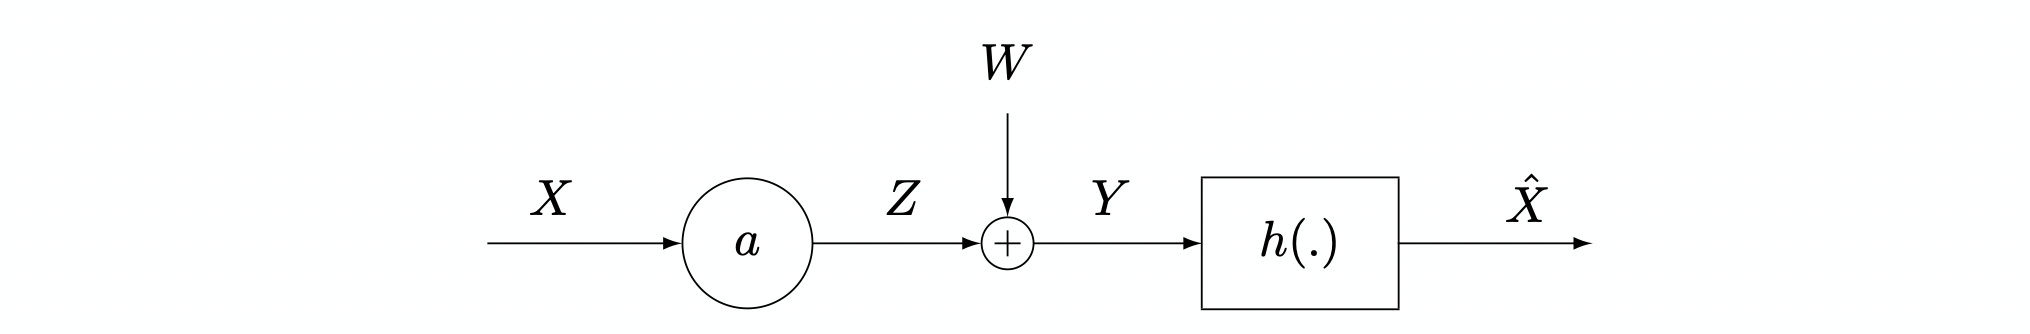

In [ ]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
#-------------------------------------------------------------------------------

#read in parameters
m_xG = 0
sigma_xG = 3
aG = 1
sigma_wG = 3
def update_parameters(m_x, sigma_x, sigma_w, a):
  global m_xG, sigma_xG, sigma_wG, aG
  m_xG, sigma_xG, sigma_wG, aG = m_x, sigma_x, sigma_w, a
widgets.interact(update_parameters, m_x = widgets.FloatSlider(min=-10, max=10, value=0), sigma_x = widgets.FloatSlider(min=0.1, max=10, value=3), sigma_w = widgets.FloatSlider(min=0.1, max=10, value=3), a = widgets.FloatSlider(min=0.1, max=10, value=1));

#Important Stuff
################################################################################
#X and W are both gaussian R.V.
gaussian_pdf = lambda x, m_x, sigma_x: 1/(np.sqrt(2*np.pi)*sigma_x) * np.exp(-(x-m_x)**2 / (2*sigma_x**2))

def compute_pdfs():
  fx_values = gaussian_pdf(x_values, m_xG, sigma_xG) #f(x)
  fw_values = gaussian_pdf(w_values, 0, sigma_wG) #f(w)
  fxy_values = gaussian_pdf(X, m_xG, sigma_xG) * gaussian_pdf(Y-aG*X, 0, sigma_wG) #f(y,x)
  return (fx_values, fw_values,fxy_values)
################################################################################

#range to display
x_values = np.arange(-10,10,0.5)
w_values = np.arange(-10,10,0.5)
y_values = np.arange(-10,10,0.5)
X, Y = np.meshgrid(x_values, y_values)

def illustrate():
  (fx_values, fw_values,fxy_values) = compute_pdfs()

  fig = plt.figure(figsize=(24, 8))

  ax1 = fig.add_subplot(1, 3, 1)
  ax1.grid()
  ax1.set_xlabel('$x$', fontsize=14)
  ax1.set_ylabel('$f(x \mid \mu_x, \sigma_x)$', fontsize=14)
  ax1.axis(xmin=x_values[0], xmax=x_values[-1])
  ax1.plot(x_values, fx_values, alpha=0.5, marker='o', markersize=8);

  ax2 = fig.add_subplot(1, 3, 2)
  ax2.grid()
  ax2.set_xlabel('$w$', fontsize=14)
  ax2.set_ylabel('$f(w \mid \sigma_W)$', fontsize=14)
  ax2.axis(xmin=w_values[0], xmax=w_values[-1])
  ax2.plot(w_values, fw_values, alpha=0.5, marker='o', markersize=8);

  ax3 = fig.add_subplot(1, 3, 3, projection='3d')
  ax3.plot_surface(X, Y, fxy_values, cmap='terrain', alpha=0.6)
  ax3.plot_wireframe(X, Y, fxy_values, color='black', alpha=0.5, linewidths=1)
  ax3.set_xlabel('$x$', fontsize = 15, labelpad=10)
  ax3.set_ylabel('$y$', fontsize = 15, labelpad=10)
  ax3.set_zlabel('$f(y, x)$', fontsize = 15, labelpad=10)

interactive(children=(FloatSlider(value=0.0, description='m_x', max=10.0, min=-10.0), FloatSlider(value=3.0, d…

The code cell above allows you to set parameters for the distributions of $X$ and $W$. This will affect how MLE, MAP and Bayesian MMSE estimation will estimate $X$ given $Y$. Below the pdf of $X$ and $W$ as well as the joint pdf of $X$ and $Y$ are plotted for illustration.

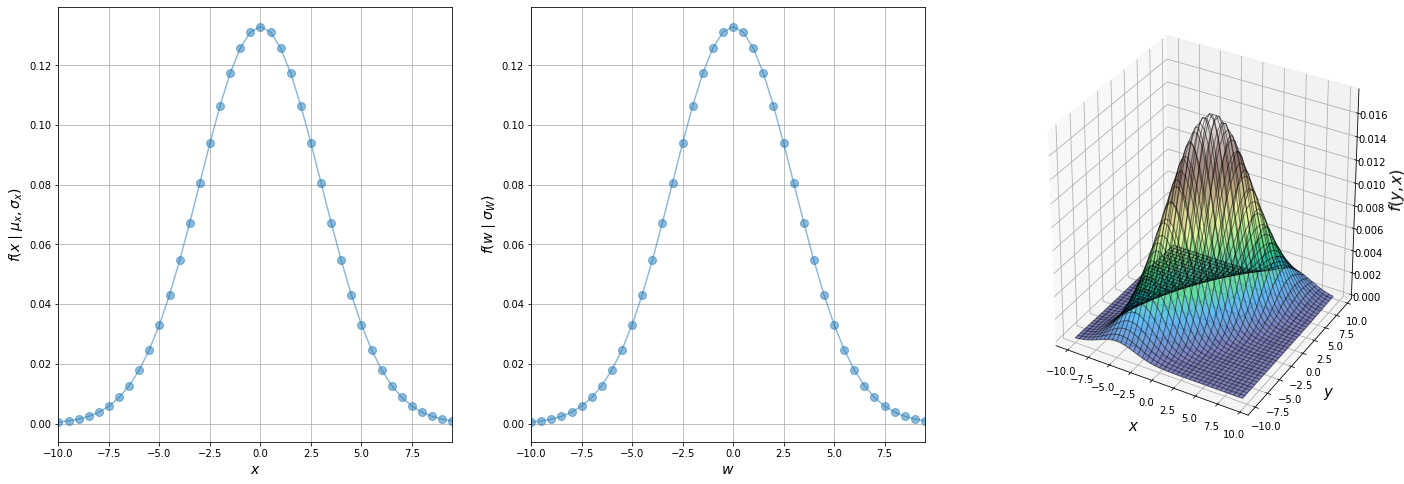

In [ ]:
illustrate()

In [ ]:
#read in parameter
yG = 0
def update_y(y):
  global yG
  yG = y
widgets.interact(update_y, y = widgets.FloatSlider(min=-10, max=10, value=0));

#Important Stuff
################################################################################
def compute_statistics():
  fx_y_values = gaussian_pdf(yG-aG*x_values, 0, sigma_wG) #f(y|x)
  x_hat1 = yG/aG #MSE

  fxy_values = gaussian_pdf(x_values, m_xG, sigma_xG) * gaussian_pdf(yG-aG*x_values, 0, sigma_wG) #f(y,x)
  x_hat2 = (m_xG/sigma_xG**2 + aG*yG/sigma_wG**2)/(1/sigma_xG**2 + aG**2/sigma_wG**2) #MAP

  x_hat3 = (sigma_wG**2 * m_xG + aG * sigma_xG**2 * yG)/(sigma_wG**2 + aG**2 * sigma_xG**2) #Bayesian MMSE

  return (fx_y_values, x_hat1, fxy_values, x_hat2, x_hat3)
################################################################################

def illustrate2():
  (fx_y_values, x_hat1, fxy_values, x_hat2, x_hat3) = compute_statistics()
  
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 8))

  ax1.grid()
  ax1.set_xlabel('$x$ with MLE $\hat{x} =$ ' + "{:.2f}".format(x_hat1), fontsize=14)
  ax1.set_ylabel('$f(y \mid x)$', fontsize=14)
  ax1.axis(xmin=x_values[0], xmax=x_values[-1])
  ax1.plot(x_values, fx_y_values, alpha=0.5, marker='o', markersize=8);

  ax2.grid()
  ax2.set_xlabel('$x$ with MAP $\hat{x} =$ ' + "{:.2f}".format(x_hat2) + " and Bayesian MMSE Estimate $\hat{x} =$ " + "{:.2f}".format(x_hat3), fontsize=14)
  ax2.set_ylabel('$f(x \mid y)$', fontsize=14)
  ax2.axis(xmin=x_values[0], xmax=x_values[-1])
  ax2.plot(x_values, fxy_values, alpha=0.5, marker='o', markersize=8);

interactive(children=(FloatSlider(value=0.0, description='y', max=10.0, min=-10.0), Output()), _dom_classes=('…

The code cell above allows you to set the observed value of $Y$ and compute MLE, MAP and Bayesian MMSE estimation. Below the conditional probabilities used for estimation are plotted. You can see that MLE and MAP estimation both pick out the maximum value of the pdf.

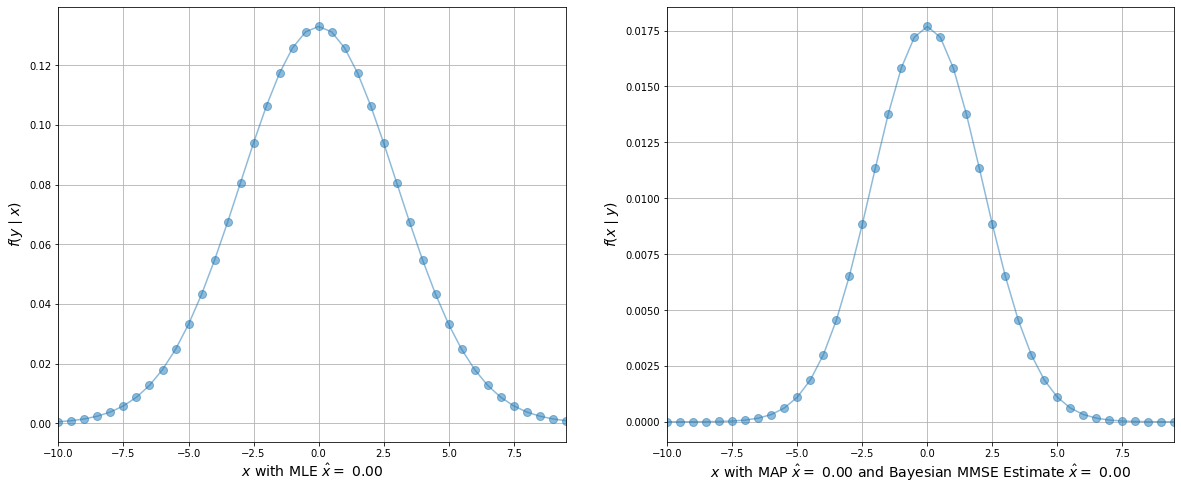

In [ ]:
illustrate2()

Notice that in this case MAP Estimation coincides with MMSE Estimation. Why is that?

# LMMSE Estimation

LMMSE Estimation is similar to Bayesian Estimation. However, instead of minimizing $\mathbb{E}[|\hat{x}-X|^2 | Y=y]$ we minimize $\mathbb{E}[|\hat{x}-X|^2]$. Also, while in Bayesian estimation $\hat{x} = \mathbb{E} [X | Y = y]$ may depend arbitrarily on $y$ in LMMSE estimation $\hat{x}$ is of the linear form $\hat{x} = h_1 Y_1 + \ldots + h_n Y_n$.

## Example 5.2 (page 135 in lecture notes as of 2020)

Let $X$ have mean $m_X = 0$ and variance $\sigma_X^2$. We want to estimate $X$ based on the observed vector $Y = aX + W$ with known $a\in \mathbb{R}^n$ and noise $W$, which has zero mean, variance $\sigma_W^2 I$ and is independent of $X$. To make the example more tangible let us fix $n=2$ observations.

In [ ]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#-------------------------------------------------------------------------------

#Important Stuff
################################################################################
def calculate_h(a, m_X, sigma_X, sigma_W):
  return np.conj(a)/(np.linalg.norm(a)**2 + sigma_W**2/(sigma_X**2+m_X**2))
################################################################################

#read in parameters
m_XG = 0
sigma_XG = 1
sigma_WG = 1
a_1G = 1
a_2G = 1
y_1G = 0
y_2G = 0
h_1G = 0
h_2G = 0
def update_parameters2(m_X, sigma_X, sigma_W, a_1, a_2):
  global a_1G, a_2G, m_XG, sigma_XG, sigma_WG, h_1G, h_2G
  a_1G, a_2G, m_XG, sigma_XG, sigma_WG = a_1, a_2, m_X, sigma_X, sigma_W,

  h_1G, h_2G = calculate_h([a_1G, a_2G], m_XG, sigma_XG, sigma_WG)
  print("h_opt = ", h_1G, ",", h_2G)
widgets.interact(update_parameters2, m_X = widgets.FloatSlider(min=-10, max=10, value=0), sigma_X = widgets.FloatSlider(min=0, max=2, value=1), sigma_W = widgets.FloatSlider(min=0, max=2, value=1), a_1 = widgets.FloatSlider(min=-3, max=3, value=1), a_2 = widgets.FloatSlider(min=-3, max=3, value=1));

interactive(children=(FloatSlider(value=0.0, description='m_X', max=10.0, min=-10.0), FloatSlider(value=1.0, d…

You may set the conditions for the problem. The ideal coefficients for LMMSE are found by the orthogonality principle (theorem 5.3 as of 2020) which in this case yield the formula $h^T = a^h \left( ||a||^2 + \frac{\sigma_W^2}{\mathbb{E}[|X|^2]} \right)^{-1}$.

In [ ]:
#Important Stuff
################################################################################
x_best = lambda y_1, y_2, h_1, h_2: y_1*h_1 + y_2*h_2

def update_observables(y_1, y_2):
  global y_1G, y_2G
  y_1G, y_2G = y_1, y_2

  print("x_best = ", y_1G*h_1G + y_2G*h_2G)
widgets.interact(update_observables, y_1 = widgets.FloatSlider(min=-10, max=10, value=0), y_2 = widgets.FloatSlider(min=-10, max=10, value=0));

y1_values = np.linspace(-10,10,100)
y2_values = np.linspace(-10,10,100)
Y1, Y2 = np.meshgrid(y1_values, y2_values)
def illustrate():
  x_best_values = x_best(Y1, Y2, h_1G, h_2G)
  fig = plt.figure(figsize=(20, 8))
  ax = fig.add_subplot(1, 1, 1, projection='3d')
  ax.plot_surface(Y1, Y2, x_best_values, cmap='terrain', alpha=0.6)
  ax.plot_wireframe(Y1, Y2, x_best_values, color='black', alpha=0.5, linewidths=1)
  ax.set(xlabel='$y1$', ylabel='$y2$')
  ax.set_zlabel('$x_{best}$', labelpad=10)

interactive(children=(FloatSlider(value=0.0, description='y_1', max=10.0, min=-10.0), FloatSlider(value=0.0, d…

Here you can play around with the observed values. $x_{best}$ denotes the estimated value of $X$ with LMMSE estimation. In case you want to see the general behaviour $x_{best}$ is plotted against the full range of observable values below. The plane can be oriented by changing the assumptions on the random variables at the start.

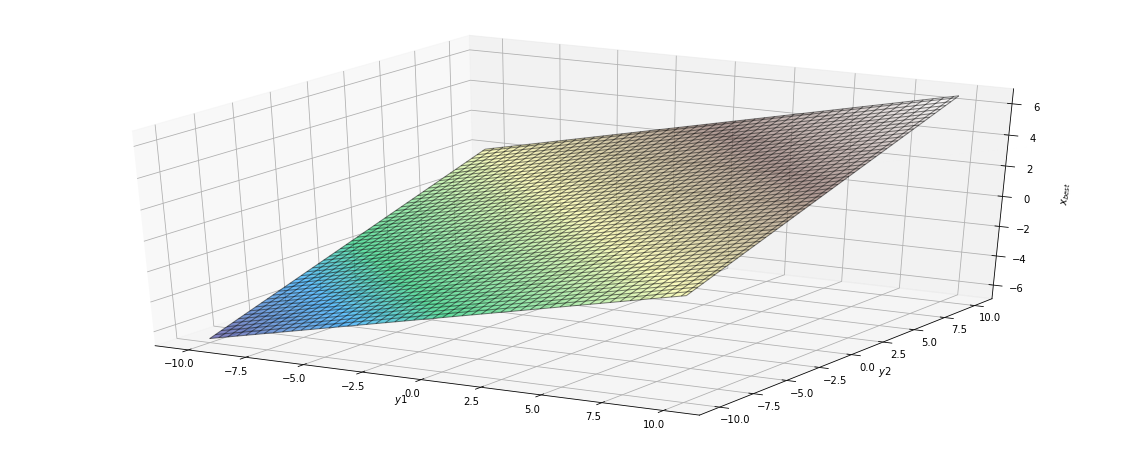

In [ ]:
illustrate()

## Important "exam-like" example

Let $X_1$ and $X_2$ be hidden variables with Covariance Matrix $V_X$ and Mean $\mathbb{E}[X_1], \mathbb{E}[X_2]$. We want to estimate $X_1$ and $X_2$ based on the observed value $Y = aX_1 + b X_2$ with known $a,b\in \mathbb{R}$. The task is to find out the linear coefficients $h = \begin{pmatrix} h_1 \\ h_2 \end{pmatrix}$ such that $\hat{X} = h^T Y$ optimally estimates $X$.

In [ ]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#-------------------------------------------------------------------------------

#read in parameters
aG = 1
bG = 1

m_xG = [0,0]
var_xG = [[1,0], [0,1]]
corr_xG = [[1,0], [0,1]]

m_yyG = 0
m_xyG = [0,0]
hG = [0,0]

def update_parameters3(a, b, m_x_1, m_x_2, vx1, vx1_x2, vx2):
  global aG, bG, x1G, x1_x2G, x2G, m_xG, corr_xG, m_yyG, m_xyG, hG
  aG, bG, var_xG[0][0], var_xG[0][1], var_xG[1][0], var_xG[1][1], m_xG[0], m_xG[1] = a, b, vx1, vx1_x2, vx1_x2, vx2, m_x_1, m_x_2

  #important stuff
  ##############################################################################
  corr_xG[0][0] = var_xG[0][0] + m_xG[0]**2
  corr_xG[0][1] = corr_xG[1][0] = var_xG[0][1] + m_xG[0]*m_xG[1]
  corr_xG[1][1] = var_xG[1][1] + m_xG[1]**2

  print("Mean X")
  print("["+str(m_xG[0])+"]")
  print("["+str(m_xG[1])+"]")
  print("Variance X")
  print(var_xG[0])
  print(var_xG[1])
  print("Correlation X")
  print(corr_xG[0])
  print(corr_xG[1])

  m_yyG = [[aG**2 * corr_xG[0][0] + 2 * aG * bG * corr_xG[0][1] + bG**2 * corr_xG[1][1]]]
  m_xyG = [[aG * corr_xG[0][0] + bG * corr_xG[0][1]], [aG * corr_xG[1][0] + bG * corr_xG[1][1]]]

  hG = np.matmul(np.array(m_xyG), np.linalg.inv(np.array(m_yyG)))

widgets.interact(update_parameters3, a = widgets.FloatSlider(min=-10, max=10, value=1), b = widgets.FloatSlider(min=-10, max=10, value=1), m_x_1 = widgets.FloatSlider(min=-10, max=10, value=0, description='m(X_1)'), m_x_2 = widgets.FloatSlider(min=-10, max=10, value=0, description='m(X_2)'), vx1 = widgets.FloatSlider(min=0, max=10, value=1, description = 'Var(X_1)'), vx1_x2 = widgets.FloatSlider(min=-10, max=10, value=0, description='Cov(X_1, X_2)'), vx2 = widgets.FloatSlider(min=0, max=10, value=1, description='Var(X_2)'));

interactive(children=(FloatSlider(value=1.0, description='a', max=10.0, min=-10.0), FloatSlider(value=1.0, des…

The orthogonality condition yields $h^T\ \mathbb{E}[YY^H] = \mathbb{E} [XY^H]$. We get for $\mathbb{E}[YY^H] = a^2 \mathbb{E}[X_1^2] + 2 a b \mathbb{E}[X_1 X_2] + b^2 \mathbb{E}[X_2^2]$

In [ ]:
print("E[YY^H]")
print(m_yyG)

E[YY^H]
[[2.0]]


Similarly we get for $\mathbb{E} [XY^H] = \mathbb{E} [\begin{pmatrix}a X_1^2 + b X_1 X_2\\ a X_1 X_2 + b X_2^2\end{pmatrix}]$

In [ ]:
print("E[XY^H]")
print(m_xyG[0])
print(m_xyG[1])

E[XY^H]
[1.0]
[1.0]


Now we can deduce the optimal coefficients $h$ from the orthogonality condition

In [ ]:
print("h")
print(hG[0])
print(hG[1])

h
[0.5]
[0.5]
